<a href="https://colab.research.google.com/github/sejongsmarcle/2023_Spring_Kaggle_Study/blob/main/0329_kaggle_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 불러오기


In [2]:
import pandas as pd

In [3]:
train = pd.read_csv("/content/drive/MyDrive/KaggleStudy/DACON 서울시 따릉이 대여량 예측 경진대회/train.csv")
test = pd.read_csv("/content/drive/MyDrive/KaggleStudy/DACON 서울시 따릉이 대여량 예측 경진대회/test.csv")
submission = pd.read_csv("/content/drive/MyDrive/KaggleStudy/DACON 서울시 따릉이 대여량 예측 경진대회/submission.csv")

In [4]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [8]:
train.tail()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0
1458,2179,17,21.1,0.0,3.1,47.0,1973.0,0.046,38.0,17.0,170.0


In [6]:
print(train.shape)
print(test.shape)
print(submission.shape)

(1459, 11)
(715, 10)
(715, 2)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


# EDA

In [17]:
train.groupby('hour').mean()['count'].shape

(24,)

In [18]:
train.groupby('hour').mean()['count']

hour
0      71.766667
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    262.163934
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64

In [13]:
import matplotlib.pyplot as plt

In [19]:
#plt.plot(train.groupby('hour').mean()['count'])

In [21]:
new_cols = {'hour_bef_temperature':'temperature',	'hour_bef_precipitation':'precipitation',	'hour_bef_windspeed':'windspeed',	'hour_bef_humidity':'humidity',	'hour_bef_visibility':'visibility',	'hour_bef_ozone':'ozone',	'hour_bef_pm10':'pm10',	'hour_bef_pm2.5':'pm2.5'}

In [22]:
train.rename(columns=new_cols,inplace=True)
test.rename(columns=new_cols,inplace=True)

In [23]:
train

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [24]:
test

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0
...,...,...,...,...,...,...,...,...,...,...
710,2148,1,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN
711,2149,1,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1459 non-null   int64  
 1   hour           1459 non-null   int64  
 2   temperature    1457 non-null   float64
 3   precipitation  1457 non-null   float64
 4   windspeed      1450 non-null   float64
 5   humidity       1457 non-null   float64
 6   visibility     1457 non-null   float64
 7   ozone          1383 non-null   float64
 8   pm10           1369 non-null   float64
 9   pm2.5          1342 non-null   float64
 10  count          1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [26]:
import seaborn as sns

In [34]:
train_corr = train.corr()

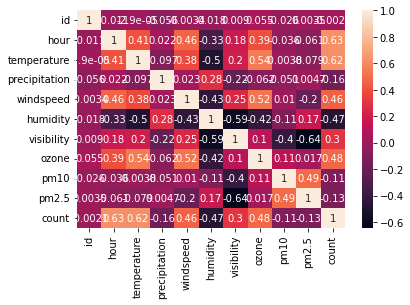

In [37]:
sns.heatmap(train_corr, annot=True)

hour, temperature, ozone, humidity, windspeed 순서로 상관도

# isna

In [69]:
features = ["hour", "temperature", "humidity", "windspeed"]

In [41]:
train[train["hour"].isna()]

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count


In [42]:
train[train["temperature"].isna()]

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [43]:
train[train["humidity"].isna()]

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


<Axes: xlabel='temperature'>

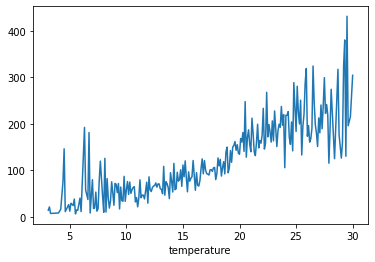

In [46]:
train.groupby('temperature').mean()['count'].plot()

<Axes: xlabel='hour'>

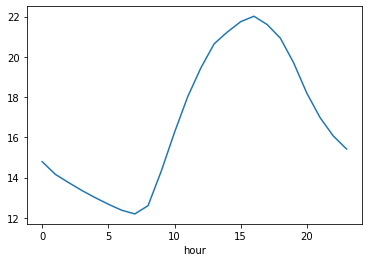

In [47]:
train.groupby('hour').mean()['temperature'].plot()

<Axes: xlabel='hour'>

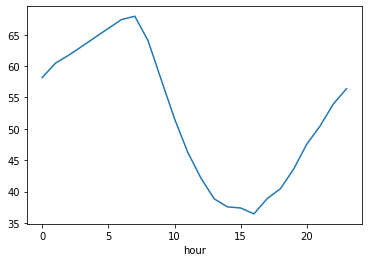

In [49]:
train.groupby('hour').mean()['humidity'].plot()

In [48]:
train.groupby('hour').mean()['temperature']

hour
0     14.788136
1     14.155738
2     13.747541
3     13.357377
4     13.001639
5     12.673770
6     12.377049
7     12.191803
8     12.600000
9     14.318033
10    16.242623
11    18.019672
12    19.457377
13    20.648333
14    21.234426
15    21.744262
16    22.015000
17    21.603333
18    20.926667
19    19.704918
20    18.191803
21    16.978333
22    16.063934
23    15.418033
Name: temperature, dtype: float64

In [50]:
train.groupby('hour').mean()['humidity']

hour
0     58.169492
1     60.459016
2     61.721311
3     63.131148
4     64.573770
5     66.000000
6     67.409836
7     67.934426
8     64.049180
9     57.803279
10    51.622951
11    46.262295
12    42.147541
13    38.850000
14    37.573770
15    37.393443
16    36.450000
17    38.883333
18    40.450000
19    43.573770
20    47.573770
21    50.450000
22    53.950820
23    56.393443
Name: humidity, dtype: float64

In [51]:
train['temperature'].fillna({934:14.788136,1035:20.926667}, inplace=True)
train['humidity'].fillna({934:58.169492,1035:40.450000}, inplace=True)

In [54]:
test[test["temperature"].isna()]

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
test[test["humidity"].isna()]

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
test['temperature'].fillna({653:19.704918}, inplace=True)
test['humidity'].fillna({653:43.573770}, inplace=True)

In [56]:
test[test["humidity"].isna()]

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5


### windspeed

In [57]:
train[train["windspeed"].isna()]


,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
18,33,13,22.600000,0.0,NaN,41.000000,987.0,0.046,64.0,39.0,208.0
244,381,1,14.100000,0.0,NaN,55.000000,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.000000,0.0,NaN,50.000000,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.300000,0.0,NaN,49.000000,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.500000,0.0,NaN,31.000000,2000.0,0.058,39.0,18.0,181.0
934,1420,0,14.788136,NaN,NaN,58.169492,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,40.450000,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.400000,0.0,NaN,44.000000,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.000000,0.0,NaN,52.000000,2000.0,0.044,37.0,20.0,20.0


In [62]:
idx_windspeed = train[train["windspeed"].isna()].index

<Axes: xlabel='hour'>

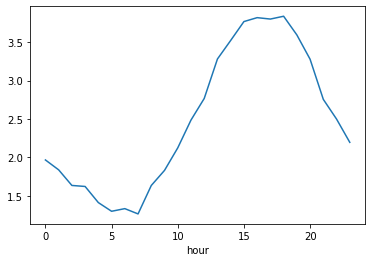

In [59]:
train.groupby('hour').mean()['windspeed'].plot()

<Axes: xlabel='temperature'>

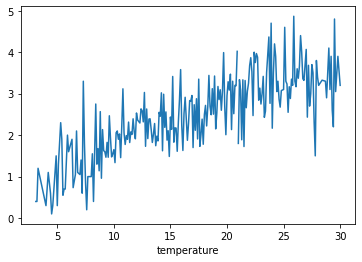

In [60]:
train.groupby('temperature').mean()['windspeed'].plot()

In [63]:
idx_windspeed

Int64Index([18, 244, 260, 376, 780, 934, 1035, 1138, 1229], dtype='int64')

In [61]:
train.groupby('hour').mean()['windspeed']

hour
0     1.965517
1     1.836667
2     1.633333
3     1.620000
4     1.409836
5     1.296721
6     1.331148
7     1.262295
8     1.632787
9     1.829508
10    2.122951
11    2.485246
12    2.766667
13    3.281356
14    3.522951
15    3.768852
16    3.820000
17    3.801667
18    3.838333
19    3.595082
20    3.278333
21    2.755000
22    2.498361
23    2.195082
Name: windspeed, dtype: float64

13 1 3 0 20 0 18 12 2

In [64]:
train['windspeed'].fillna({18:3.838333, 244:1.836667, 260:1.620000, 376:1.965517, 780:3.278333, 934:1.965517, 1035:3.838333, 1138:2.766667, 1229:1.633333}, inplace=True)

In [65]:
test[test["windspeed"].isna()]

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5
653,1943,19,19.704918,NaN,NaN,43.57377,NaN,NaN,NaN,NaN


In [66]:
test['windspeed'].fillna(3.595082, inplace = True)

In [67]:
test[test["windspeed"].isna()]

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5


## fit

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
features = ["hour", "temperature", "humidity", "windspeed"]

In [73]:
X_train = train[features]
y_train = train["count"]
X_test = test[features]

In [75]:
model_1_100 = RandomForestRegressor(n_estimators=100, random_state=1)
model_1_100_5 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=1)
model_1_200 = RandomForestRegressor(n_estimators=200, random_state=1)

In [76]:
model_1_100.fit(X_train,y_train)
model_1_100_5.fit(X_train,y_train)
model_1_200.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=1)

In [78]:
y_pred_1_100 = model_1_100.predict(X_test)
y_pred_1_100_5 =model_1_100_5. predict(X_test)
y_pred_1_200 = model_1_200.predict(X_test)

In [79]:
submission

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN
...,...,...
710,2148,NaN
711,2149,NaN
712,2165,NaN
713,2166,NaN


In [80]:
submission['count'] = y_pred_1_100
submission.to_csv('model_1_100.csv', index=False)

submission['count'] = y_pred_1_100_5
submission.to_csv('model_1_100_5.csv', index=False)

submission['count'] = y_pred_1_200
submission.to_csv('model_1_200.csv', index=False)

## 'ozone' 결측값 전처리

In [81]:
train[train['ozone'].isna()]

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
14,28,1,20.0,0.0,1.8,58.0,2000.0,NaN,NaN,NaN,74.0
44,76,17,21.7,0.0,3.0,35.0,2000.0,NaN,32.0,19.0,213.0
46,78,1,12.2,0.0,3.0,49.0,1071.0,NaN,NaN,NaN,36.0
84,130,1,9.4,0.0,2.5,65.0,1907.0,NaN,NaN,NaN,39.0
122,181,16,26.2,0.0,4.3,31.0,1718.0,NaN,47.0,23.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...
1283,1941,1,16.6,0.0,2.1,35.0,2000.0,NaN,NaN,NaN,62.0
1322,1994,1,15.1,0.0,1.3,35.0,2000.0,NaN,NaN,NaN,40.0
1329,2005,1,17.7,0.0,1.0,43.0,1338.0,NaN,NaN,NaN,69.0
1361,2047,1,12.6,0.0,2.4,48.0,1805.0,NaN,NaN,NaN,43.0


In [93]:
train['ozone'].isna().sum()

76

In [84]:
train['ozone'][train['hour']==1].isna().sum()

61

In [88]:
train.groupby('temperature').mean()["ozone"]

temperature
3.1     0.005
3.2     0.004
3.3     0.016
4.0     0.021
4.2     0.024
        ...  
29.4    0.062
29.5    0.057
29.6    0.080
29.8    0.058
30.0    0.100
Name: ozone, Length: 247, dtype: float64

<Axes: xlabel='temperature'>

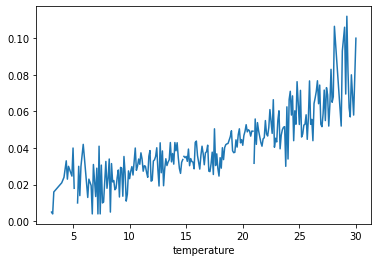

In [89]:
train.groupby('temperature').mean()["ozone"].plot()

<Axes: xlabel='hour'>

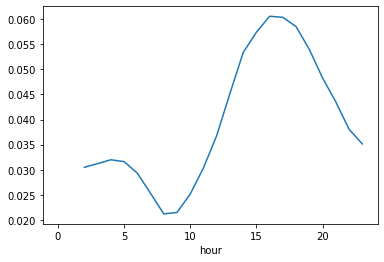

In [90]:
train.groupby('hour').mean()["ozone"].plot()

In [100]:
ozone_mean = train.groupby('hour').mean()["ozone"]

1안 : 0시와 2시의 평균을 넣자.

2안 : 23~0시 증가율을 반영하자.

In [97]:
rate_23to0 = 0.035148-0.033763

In [98]:
hour1_ozone = 0.033763-rate_23to0

In [99]:
hour1_ozone

0.032378000000000004

In [101]:
ozone_mean[1] = hour1_ozone

In [102]:
ozone_mean

hour
0     0.033763
1     0.032378
2     0.030492
3     0.031213
4     0.031984
5     0.031623
6     0.029317
7     0.025300
8     0.021197
9     0.021492
10    0.025167
11    0.030367
12    0.036817
13    0.045203
14    0.053344
15    0.057400
16    0.060579
17    0.060362
18    0.058508
19    0.053967
20    0.048279
21    0.043517
22    0.038066
23    0.035148
Name: ozone, dtype: float64

In [103]:
ozone_idx = train[train['ozone'].isna()].index

In [104]:
print(ozone_idx)

Int64Index([  14,   44,   46,   84,  122,  140,  142,  147,  158,  176,  222,
             236,  244,  265,  289,  317,  324,  331,  356,  422,  429,  451,
             463,  466,  472,  479,  507,  532,  537,  554,  576,  579,  589,
             595,  623,  624,  631,  645,  649,  660,  686,  698,  708,  728,
             745,  763,  778,  796,  811,  861,  868,  876,  897,  934,  957,
             970, 1024, 1035, 1070, 1100, 1120, 1142, 1154, 1156, 1165, 1168,
            1186, 1211, 1221, 1273, 1278, 1283, 1322, 1329, 1361, 1391],
           dtype='int64')


In [106]:
train['hour'][0]

20

In [107]:
for idx in ozone_idx:
  train['ozone'][idx] = ozone_mean[train['hour'][idx]]

<ipython-input-107-17832fbc784c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ozone'][idx] = ozone_mean[train['hour'][idx]]


In [108]:
train[train['ozone'].isna()]


,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count


In [112]:
train.loc[ozone_idx,:]

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
14,28,1,20.0,0.0,1.8,58.0,2000.0,0.032378,NaN,NaN,74.0
44,76,17,21.7,0.0,3.0,35.0,2000.0,0.060362,32.0,19.0,213.0
46,78,1,12.2,0.0,3.0,49.0,1071.0,0.032378,NaN,NaN,36.0
84,130,1,9.4,0.0,2.5,65.0,1907.0,0.032378,NaN,NaN,39.0
122,181,16,26.2,0.0,4.3,31.0,1718.0,0.060579,47.0,23.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...
1283,1941,1,16.6,0.0,2.1,35.0,2000.0,0.032378,NaN,NaN,62.0
1322,1994,1,15.1,0.0,1.3,35.0,2000.0,0.032378,NaN,NaN,40.0
1329,2005,1,17.7,0.0,1.0,43.0,1338.0,0.032378,NaN,NaN,69.0
1361,2047,1,12.6,0.0,2.4,48.0,1805.0,0.032378,NaN,NaN,43.0


In [115]:
ozone_idx_test = test[test['ozone'].isna()].index

In [116]:
for idx in ozone_idx_test:
  test['ozone'][idx] = ozone_mean[test['hour'][idx]]

<ipython-input-116-3133569372b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ozone'][idx] = ozone_mean[test['hour'][idx]]


In [118]:
test.loc[ozone_idx_test,:]

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5
32,82,1,22.800000,0.0,2.400000,52.00000,2000.0,0.032378,NaN,NaN
40,115,1,21.500000,1.0,0.500000,90.00000,347.0,0.032378,NaN,NaN
47,147,1,22.800000,0.0,1.200000,57.00000,1190.0,0.032378,NaN,NaN
86,260,1,20.000000,0.0,2.000000,65.00000,1662.0,0.032378,NaN,NaN
92,270,1,20.000000,0.0,1.700000,31.00000,2000.0,0.032378,NaN,NaN
102,297,1,15.100000,1.0,2.200000,98.00000,224.0,0.032378,NaN,NaN
114,323,1,18.700000,0.0,1.400000,41.00000,2000.0,0.032378,NaN,NaN
126,352,1,19.200000,0.0,1.400000,80.00000,1085.0,0.032378,NaN,NaN
129,358,1,23.600000,0.0,0.900000,83.00000,466.0,0.032378,NaN,NaN
209,609,1,18.600000,0.0,2.400000,37.00000,2000.0,0.032378,NaN,NaN


In [113]:
features_2 = ["hour", "temperature", "humidity", "windspeed","ozone"]

In [119]:
X_train_2 = train[features_2]
y_train_2 = train["count"]
X_test_2 = test[features_2]


model_2_100 = RandomForestRegressor(n_estimators=100, random_state=1)
model_2_100_5 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=1)
model_2_200 = RandomForestRegressor(n_estimators=200, random_state=1)

model_2_100.fit(X_train_2,y_train_2)
model_2_100_5.fit(X_train_2,y_train_2)
model_2_200.fit(X_train_2,y_train_2)

y_pred_2_100 = model_2_100.predict(X_test_2)
y_pred_2_100_5 =model_2_100_5. predict(X_test_2)
y_pred_2_200 = model_2_200.predict(X_test_2)

submission['count'] = y_pred_2_100
submission.to_csv('model_2_100.csv', index=False)

submission['count'] = y_pred_2_100_5
submission.to_csv('model_2_100_5.csv', index=False)

submission['count'] = y_pred_2_200
submission.to_csv('model_2_200.csv', index=False)